# Chapter 0: Introduction

Code related to [Chapter 0: Introduction](https://introtcs.org/public/lec_01_introduction.html) of the book __Introduction to Theoretical Computer Science__ by Boaz Barak. [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/boazbk/tcscode/blob/master/chap_01_introduction.ipynb)


### Grade-school multiplication algorithm:

In [1]:
def gradeschool_mult(x,y):
    '''Multiply two integers via gradeschool algorithm.'''
    x = str(x);
    z = 0
    for i in range(len(x)):
        z += 10**i*int(x[len(x)-1-i])*y

    return z

In [2]:
def gradeschool_mult(x,y):
    """Multiply two integers via gradeschool algorithm: recursive implementation"""
    if x<10 or y<10: return x*y
    x = str(x); y = str(y);
    # convert to string of 0/1's, MSB first
    n = max(len(x),len(y))
    x = "0"*(n-len(x))+x; y = "0"*(n-len(y))+y # add leading zeroes if needed
    m = n//2
    xtop = int(x[:-m]); xbot = int(x[-m:])
    ytop = int(y[:-m]); ybot = int(y[-m:])
    return 10**(2*m)*gradeschool_mult(xtop,ytop)+10**m*(gradeschool_mult(xtop,ybot)+gradeschool_mult(xbot,ytop))+gradeschool_mult(xbot,ybot)

In [4]:
gradeschool_mult(123,343)

42189

### Karatsuba multiplication

In [5]:
def karatsuba_mult(x,y):
    '''Multiply two simlar length integers via karatsuba algorithm.'''
    if x<100 or y<100: return x*y
    x = str(x); y = str(y);
    # convert to string of 0/1's, MSB first
    n = max(len(x),len(y))
    x = "0"*(n-len(x))+x; y = "0"*(n-len(y))+y # add leading zeroes if needed
    m = n//2
    xtop = int(x[:-m]); xbot = int(x[-m:])
    ytop = int(y[:-m]); ybot = int(y[-m:])
    return (10**(2*m)-10**m)*karatsuba_mult(xtop,ytop)+(10**m)*karatsuba_mult(xtop+xbot,ytop+ybot) +(1-10**m)*karatsuba_mult(xbot,ybot)


In [6]:
karatsuba_mult(12342323,3464565463)==12342323* 3464565463

True

In [7]:
12342323* 3464565463

42760785998990549

### Time both algorithms

In [13]:
input_lengths  = [2**i for i in range(4,15,2)]
gradeschool_times = {}
karatsuba_times = {}


In [14]:
# this can take a while
import random
for n in input_lengths:
    x = random.randrange(10**n)
    y = random.randrange(10**n)
    r = x*y
    #print(r)
    print(f"Gradeschool n = {n}")
    foo =  %timeit -o -r1 -n1 gradeschool_mult(x,y)
    print(f"Karatsuba n = {n}")
    bar = %timeit -o -r1 -n1 karatsuba_mult(x,y)
    gradeschool_times[n] = foo
    karatsuba_times[n] = bar

Gradeschool n = 16
448 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
Karatsuba n = 16
331 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
Gradeschool n = 64
8.91 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
Karatsuba n = 64
2.49 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
Gradeschool n = 256
232 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
Karatsuba n = 256
21.3 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
Gradeschool n = 1024
2.63 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
Karatsuba n = 1024
147 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
Gradeschool n = 4096
37.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
Karatsuba n = 4096
1.34 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
Gradeschool n = 16384
10min 23s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
Karatsuba n = 16384
5.9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop e

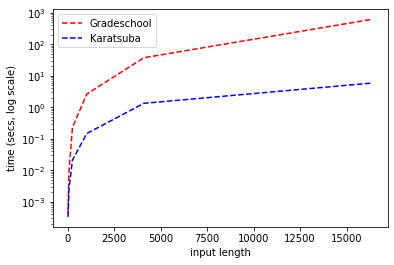

In [15]:
import matplotlib.pyplot as plt

gs_lengths, gs_times = zip(*sorted(gradeschool_times.items())) # unpack a list of pairs into two tuples

ka_lengths, ka_times =  zip(*sorted(karatsuba_times.items()))

gs_times = [t.best for t in gs_times]
ka_times = [t.best for t in ka_times]

line1, line2 = plt.plot(gs_lengths, gs_times, 'r--', ka_lengths, ka_times, 'b--')
plt.xlabel('input length')
plt.ylabel('time (secs, log scale)')
plt.yscale('log')
plt.legend([line1,line2],['Gradeschool','Karatsuba'])
plt.show()